In [2]:
from functools import partial
from rasterio.windows import Window
import numpy as np

from dl_toolbox.normalizations import StretchToMinmaxCommon, ZeroAverageCommon
from dl_toolbox.datasources import Digitanie
from dl_toolbox.datasets import Raster
from dl_toolbox.augmentations import *

In [30]:
normalization = partial(
    StretchToMinmaxCommon,
    minval=[0,0,0,0],
    #maxval=[1,1,1,1]
    #minval=[0.036,0.05,0.079,0],
    maxval=[0.5,0.5,0.5,1]
)

image_path = '/work/AI4GEO/data/DATA/DATASETS/DIGITANIE_v3/TOULOUSE/TOULOUSE_20130924_T_TOA_reproj-EPSG32631_cog_tile_0.tif'
label_path = '/work/AI4GEO/data/DATA/DATASETS/DIGITANIE_v3/TOULOUSE/COS9/TOULOUSE_0_mask_cog.tif'

src = Digitanie(
    bands=[1,2,3],
    #image_path='/mnt/d/pfournie/Documents/data/DIGITANIE_v3/Toulouse/Toulouse_EPSG32631_5.tif',
    image_path=image_path,
    zone=Window(0, 0, 2000, 2000),
    #label_path='/mnt/d/pfournie/Documents/data/DIGITANIE_v3/Toulouse/COS9/Toulouse_5.tif',
    label_path=label_path,
    nomenclature_name='main',
    normalization=normalization
)

standardize = partial(
    ZeroAverageCommon,
    #meanval=[0.123, 0.133, 0.144, 0.197]
    meanval=[0, 0, 0, 0]
)
    
ds = Raster(
    data_src=src,
    crop_size=1024,
    standardize=standardize,
    transforms=NoOp()
)

elem = ds[0]

[0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5]


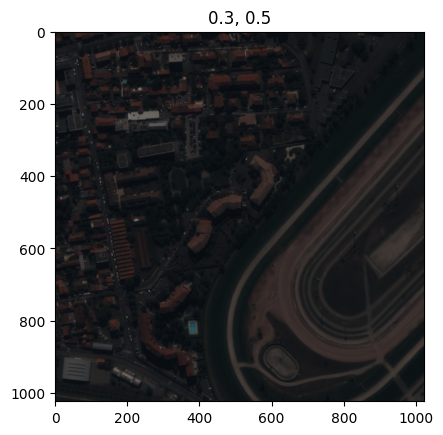

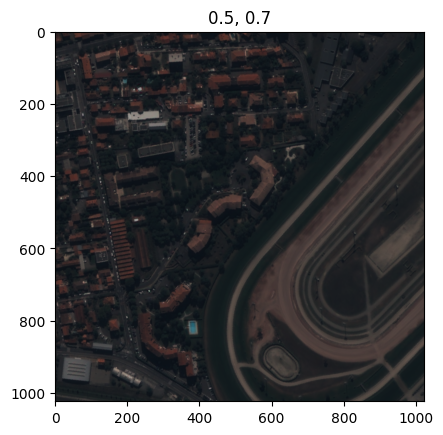

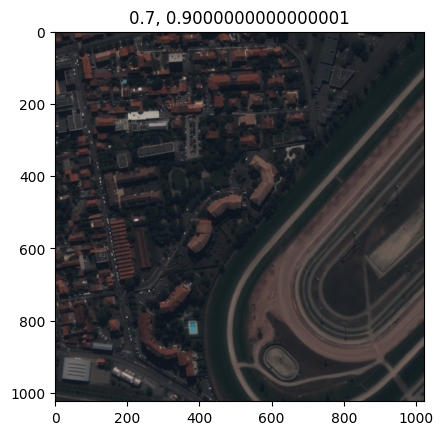

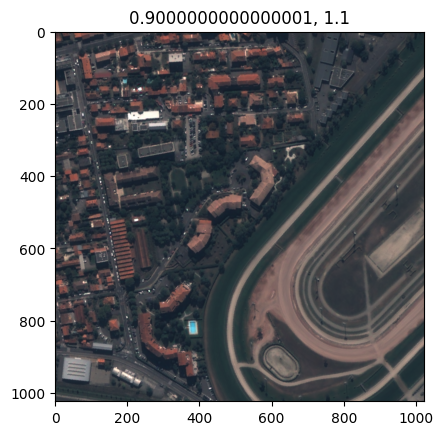

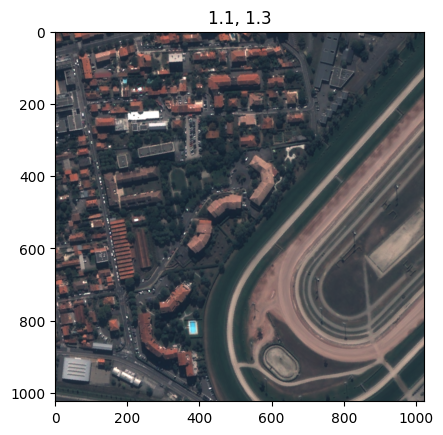

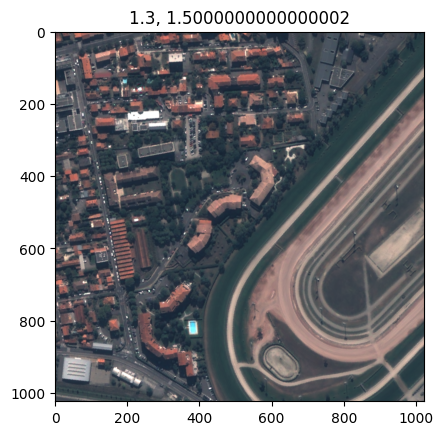

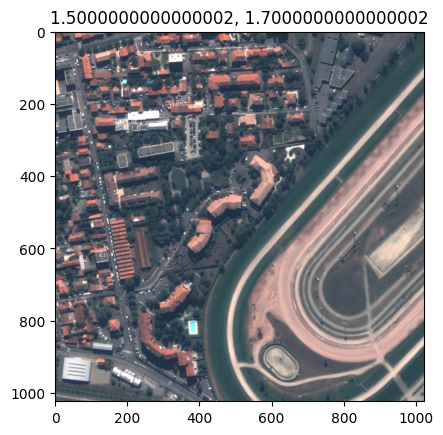

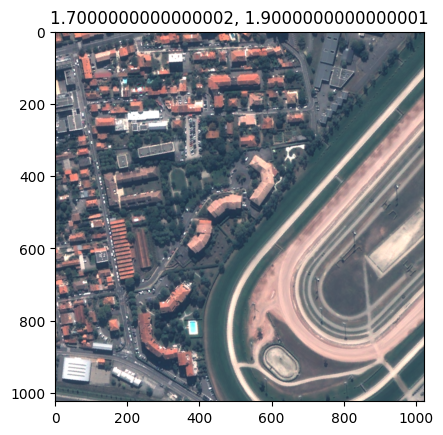

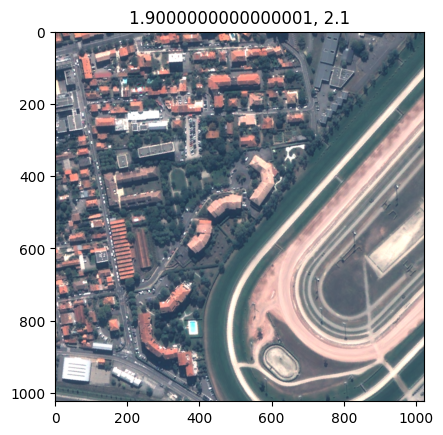

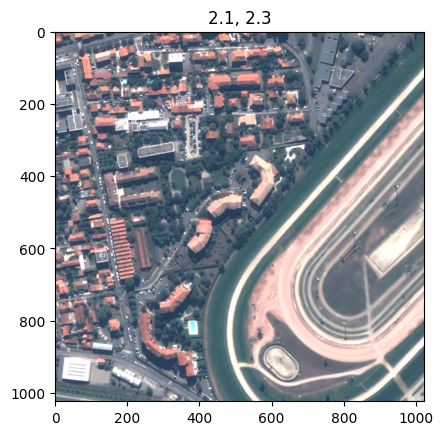

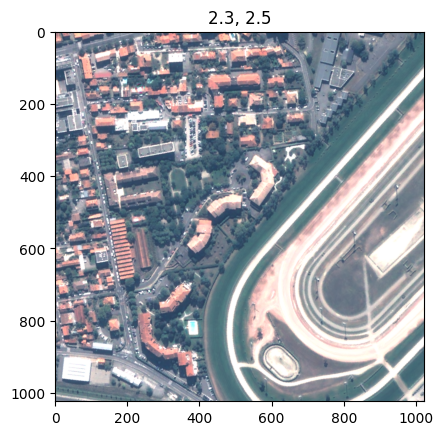

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
#from skimage import exposure

pre_image =elem['pre_image']
pre_image = pre_image.numpy().transpose(1,2,0)

bounds = np.linspace(0.3, 2.5, 12)
print(bounds)
for low, high in zip(bounds[:-1], bounds[1:]):
    
    transform = Brightness(bounds=(low, high), p=1)
    image, _ = transform(elem['image'])
    image = image.numpy().transpose(1,2,0)
    
    plt.imshow(image)
    plt.title(label=f'{low}, {high}')
    plt.show()


#image = elem['image']
#image = image.numpy().transpose(1,2,0)
#
#print(image.dtype)
#print(np.min(image), np.max(image))
##image = exposure.adjust_gamma(image, 0.3)
#
#fig = plt.figure(figsize=(20,20))
#ax1 = fig.add_subplot(121)
#ax1.imshow(pre_image)
#ax2 = fig.add_subplot(122)
#ax2.imshow(image)